<a href="https://colab.research.google.com/github/edu230991/pyenerginet/blob/main/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to pyenerginet
First let's start by installing the package.

In [1]:
pip install pyenerginet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 23.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.25.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


Let's import some pacakges just to test the functionality and visualize some charts.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from pyenerginet import EnerginetData

Let's check out wind forecast evolution for the last couple days and how it compares with meter readings.

In [3]:
end = pd.Timestamp("now").tz_localize("UTC")
start = end.normalize() - pd.Timedelta("1d")

In [4]:
# initialize the class
endk = EnerginetData()

In [5]:
ofw_fc = endk.get_res_forecast(start, end, price_area="DK1", tech="Offshore Wind")

In [7]:
ofw_fc.head()

,,ForecastDayAhead,ForecastIntraday,Forecast5Hour,Forecast1Hour,ForecastCurrent
Hour,Timestamp,,,,,
2024-03-19 00:00:00+00:00,2024-03-19 00:06:19+00:00,862.208313,992.625000,864.833313,983.083313,992.625000
2024-03-19 01:00:00+00:00,2024-03-19 01:01:20+00:00,864.208313,935.708313,898.875000,964.583313,935.708313
2024-03-19 02:00:00+00:00,2024-03-19 02:06:19+00:00,868.541687,907.916687,911.166687,930.000000,907.916687
2024-03-19 03:00:00+00:00,2024-03-19 03:06:20+00:00,866.125000,947.583313,914.000000,897.166687,947.583313
2024-03-19 04:00:00+00:00,2024-03-19 04:01:21+00:00,868.208313,969.458313,908.458313,931.333313,969.458313


In [8]:
# there is only one revision of the forecast per delivery period, so get rid of second dimension of the index
ofw_fc = ofw_fc.droplevel(axis=0, level=1)

In [9]:
# get real time production measurements
realtime_prod = endk.get_realtime_prod_ex(start, end, price_area="DK1", columns="OffshoreWindPower")

<Axes: xlabel='Minutes5'>

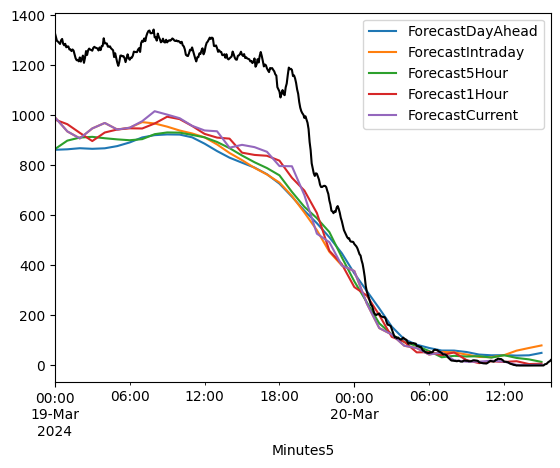

In [10]:
ofw_fc.plot()
realtime_prod.plot(color="black")